In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
dataset = pd.read_csv(r"C:\Users\Aamir Shahzad\OneDrive\Desktop\realistic_student_dataset_updated.csv")
dataset.head()

,Student_ID,Gender,Age,Nationality,Province,Program_Level,Department,Year_of_Study,GPA,Attendance_Rate,...,Scholarship_Status,Part_Time_Job,Hostel_Resident,Commute_Time,Transport_Mode,Internet_Access,Library_Usage,Canteen_Quality_Rating,Lab_Equipment_Access,Faculty_Satisfaction
0,PSY0001,Female,23,Afghan,Kabul,Masters,Psychology,1,3.18,92.5,...,Yes,Yes,No,45.0,Bus,No,3,3,Good,5.0
1,ELE0002,Female,20,Indian,Kerala,Undergraduate,Electrical Engineering,4,2.78,68.1,...,Yes,NaN,No,13.0,Bike,No,4,3,Good,4.0
2,ELE0003,Female,24,Bangladeshi,Dhaka,Undergraduate,Electrical Engineering,3,3.79,73.4,...,Yes,No,No,15.0,Walk,Yes,5,2,Average,5.0
3,MAT0004,Female,19,Afghan,Kabul,PhD,Mathematics,4,3.08,83.1,...,Yes,Yes,Yes,58.0,Car,No,3,3,Poor,3.0
4,BIO0005,Male,22,Indian,Kerala,Masters,Biology,2,3.27,94.6,...,No,No,No,17.0,Car,Yes,1,4,Good,2.0


In [3]:
dataset.shape

(1000, 25)

In [4]:
dataset.isnull().sum()

Student_ID                27
Gender                     0
Age                        0
Nationality                0
Province                  20
Program_Level              0
Department                34
Year_of_Study              0
GPA                        0
Attendance_Rate            0
Mental_Health_Score        0
Stress_Level               0
Sleep_Hours                0
Study_Hours                0
Monthly_Expenses           0
Scholarship_Status         0
Part_Time_Job             16
Hostel_Resident            0
Commute_Time              18
Transport_Mode             0
Internet_Access            0
Library_Usage              0
Canteen_Quality_Rating     0
Lab_Equipment_Access      15
Faculty_Satisfaction      19
dtype: int64

In [5]:
# Show dataset structure and data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Student_ID              973 non-null    object 
 1   Gender                  1000 non-null   object 
 2   Age                     1000 non-null   int64  
 3   Nationality             1000 non-null   object 
 4   Province                980 non-null    object 
 5   Program_Level           1000 non-null   object 
 6   Department              966 non-null    object 
 7   Year_of_Study           1000 non-null   int64  
 8   GPA                     1000 non-null   float64
 9   Attendance_Rate         1000 non-null   float64
 10  Mental_Health_Score     1000 non-null   int64  
 11  Stress_Level            1000 non-null   int64  
 12  Sleep_Hours             1000 non-null   int64  
 13  Study_Hours             1000 non-null   int64  
 14  Monthly_Expenses        1000 non-null   i

In [6]:
# First, we fix column names for consistency 
dataset.columns = dataset.columns.str.strip()

In [7]:
# Remove rows with null Student_ID  required for unique identification  
dataset = dataset.dropna(subset = ["Student_ID"])

In [8]:
dataset.shape

(973, 25)

In [9]:
dataset['Province'].value_counts()

Province
Dhaka          138
Punjab         137
Kabul          132
Herat          132
Chittagong      99
Kerala          72
KPK             66
Sindh           64
Balochistan     59
Delhi           54
Sinnd            1
Name: count, dtype: int64

In [10]:
# New mapping: Nationality to most realistic Province
province_map = {
    "Pakistani": "Punjab",         
    "Indian": "Delhi",             
    "Bangladeshi": "Dhaka",        
    "Afghan": "Kabul"              
}

# Fill Province where it's null based on Nationality
dataset.loc[dataset["Province"].isnull(), "Province"] = dataset.loc[dataset["Province"].isnull(), "Nationality"].map(province_map)

In [11]:
dataset['Department'].value_counts()

Department
Psychology                168
Computer Science          166
Biology                   164
Business                  151
Mathematics               149
Electrical Engineering    141
Compuer Science             1
Name: count, dtype: int64

In [12]:
# Dept prefix dictionary
dept_prefix = {
    'BIO': 'Biology',
    'PSY': 'Psychology',
    'ELE': 'Electrical Engineering',
    'MAT': 'Mathematics',
    'BUS': 'Business',
    'COM': 'Computer Science',
}


In [13]:
null_val = dataset['Department'].isnull()

# Apply prefix mapping only on null rows
dataset.loc[null_val, 'Department'] = dataset.loc[null_val, 'Student_ID'].str[:3].map(dept_prefix)

In [14]:
dataset['Part_Time_Job'].value_counts()

Part_Time_Job
No     504
Yes    453
Name: count, dtype: int64

In [15]:
# Fill missing Part_Time_Job with most frequent value
dataset['Part_Time_Job'] = dataset['Part_Time_Job'].fillna(dataset['Part_Time_Job'].mode()[0])

In [16]:
# Use median to replace null Commute_Time values for balance
dataset['Commute_Time'] = dataset['Commute_Time'].fillna(dataset['Commute_Time'].median())

In [17]:
dataset['Lab_Equipment_Access'].value_counts()

Lab_Equipment_Access
Good       363
Average    307
Poor       289
Name: count, dtype: int64

In [18]:
# Fill Lab_Equipment_Access with most frequent value
dataset['Lab_Equipment_Access'] = dataset['Lab_Equipment_Access'].fillna(dataset['Lab_Equipment_Access'].mode()[0])

In [19]:
dataset['Faculty_Satisfaction'].value_counts()

Faculty_Satisfaction
1.0    206
5.0    196
3.0    190
2.0    185
4.0    177
Name: count, dtype: int64

In [20]:
# Fill Faculty_Satisfaction with most frequent value
dataset['Faculty_Satisfaction'] = dataset['Faculty_Satisfaction'].fillna(dataset['Faculty_Satisfaction'].mode()[0])

In [21]:
dataset.isnull().sum()

Student_ID                0
Gender                    0
Age                       0
Nationality               0
Province                  0
Program_Level             0
Department                0
Year_of_Study             0
GPA                       0
Attendance_Rate           0
Mental_Health_Score       0
Stress_Level              0
Sleep_Hours               0
Study_Hours               0
Monthly_Expenses          0
Scholarship_Status        0
Part_Time_Job             0
Hostel_Resident           0
Commute_Time              0
Transport_Mode            0
Internet_Access           0
Library_Usage             0
Canteen_Quality_Rating    0
Lab_Equipment_Access      0
Faculty_Satisfaction      0
dtype: int64

In [22]:
# Select all object type columns except Student_ID 
str_col = dataset.select_dtypes(["object"])
str_col = [i for i in str_col if i != "Student_ID"]

In [23]:
str_col

['Gender',
 'Nationality',
 'Province',
 'Program_Level',
 'Department',
 'Scholarship_Status',
 'Part_Time_Job',
 'Hostel_Resident',
 'Transport_Mode',
 'Internet_Access',
 'Lab_Equipment_Access']

In [24]:
# Loop through string columns to check unique data values
for i in str_col:
    print(f"\n\nUniqes values in columns '{i}' :\n")
    print(dataset[i].unique())
    print(f"_________________________")



Uniqes values in columns 'Gender' :

['Female' 'Male' 'Femle']
_________________________


Uniqes values in columns 'Nationality' :

['Afghan' 'Indian' 'Bangladeshi' 'Pakistani']
_________________________


Uniqes values in columns 'Province' :

['Kabul' 'Kerala' 'Dhaka' 'Sindh' 'Balochistan' 'Delhi' 'Herat' 'Punjab'
 'KPK' 'Chittagong' 'Sinnd']
_________________________


Uniqes values in columns 'Program_Level' :

['Masters' 'Undergraduate' 'PhD']
_________________________


Uniqes values in columns 'Department' :

['Psychology' 'Electrical Engineering' 'Mathematics' 'Biology'
 'Computer Science' 'Business' 'Compuer Science']
_________________________


Uniqes values in columns 'Scholarship_Status' :

['Yes' 'No']
_________________________


Uniqes values in columns 'Part_Time_Job' :

['Yes' 'No']
_________________________


Uniqes values in columns 'Hostel_Resident' :

['No' 'Yes']
_________________________


Uniqes values in columns 'Transport_Mode' :

['Bus' 'Bike' 'Walk' 'Car' 

In [25]:
# Correct spelling mistake in 'Province' column
dataset['Province'] = dataset['Province'].replace({'Sinnd':"Sindh"})

In [26]:
# Correct spelling mistake in 'Department' column
dataset['Department'] = dataset['Department'].replace({'Compuer Science':'Computer Science'})

In [27]:
dataset['Province'].value_counts()

Province
Dhaka          145
Punjab         141
Kabul          134
Herat          132
Chittagong      99
Kerala          72
KPK             66
Sindh           65
Delhi           60
Balochistan     59
Name: count, dtype: int64

In [28]:
dataset['Department'].value_counts()

Department
Computer Science          176
Psychology                170
Biology                   169
Business                  155
Mathematics               154
Electrical Engineering    149
Name: count, dtype: int64

In [29]:
# Select all numeric columns
numric_col = dataset.select_dtypes(["int64","float64"]).columns

In [30]:
# Check skewness of numeric columns
print(dataset[numric_col].skew())

Age                      -0.027157
Year_of_Study             0.068012
GPA                       0.095907
Attendance_Rate           0.010807
Mental_Health_Score      -0.051201
Stress_Level              0.032387
Sleep_Hours               0.074159
Study_Hours               0.074772
Monthly_Expenses          0.247699
Commute_Time              0.009317
Library_Usage            -0.069239
Canteen_Quality_Rating    0.077535
Faculty_Satisfaction      0.059521
dtype: float64


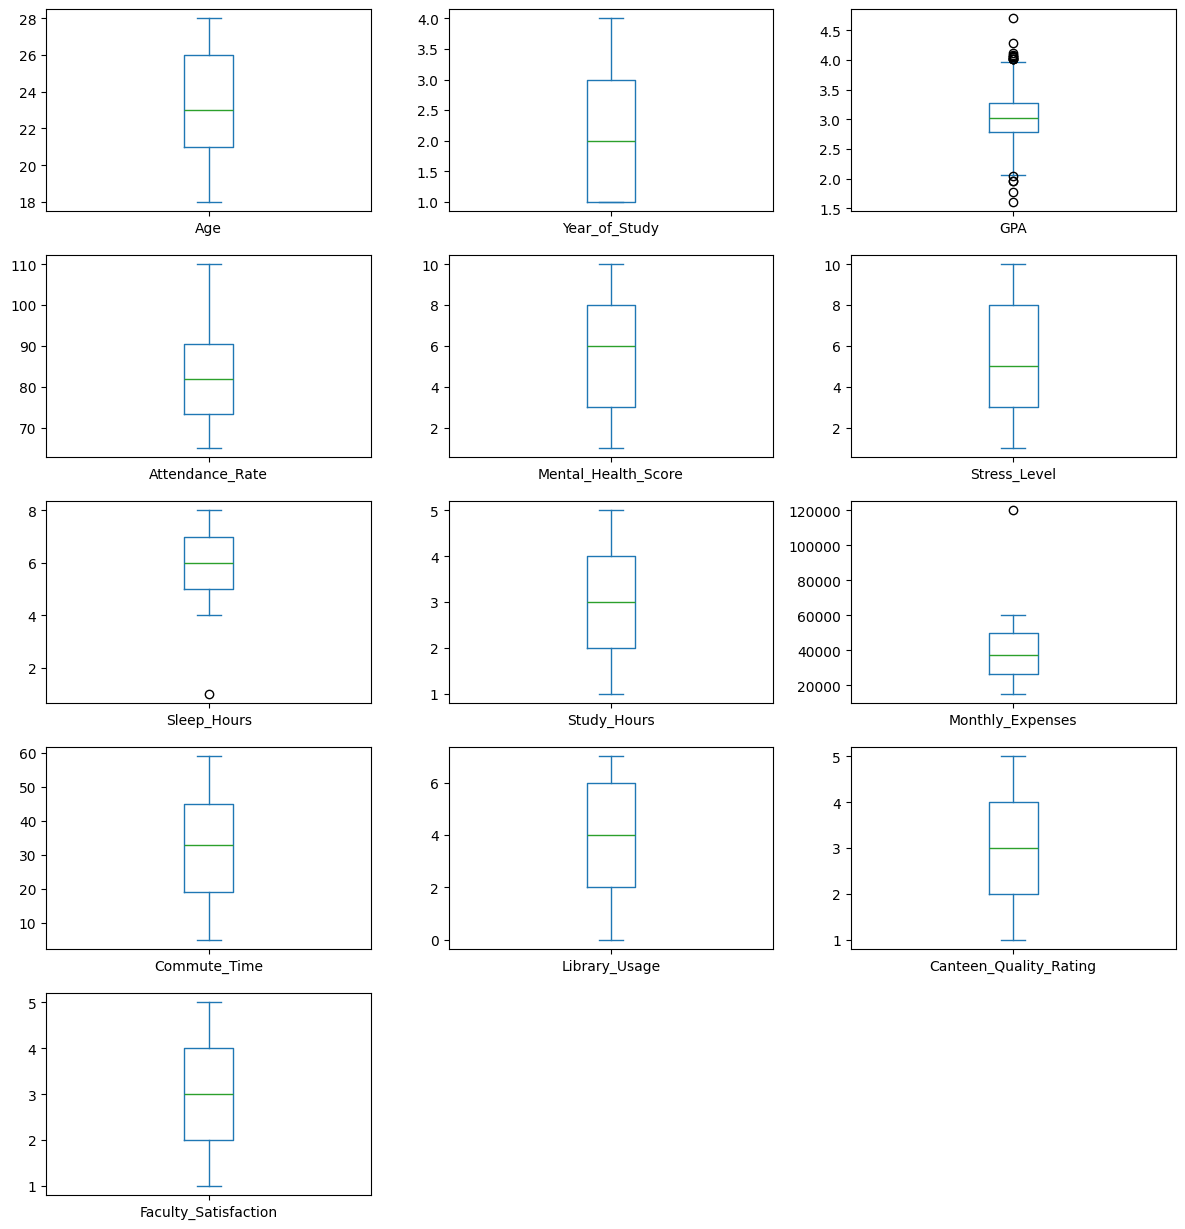

In [31]:
# Create boxplots for all columns to detect outliers
dataset.plot(
    kind = "box",
    subplots = True,
    layout = ((len(dataset.columns)//3)+1,3),
    figsize = (12,22)
)
plt.tight_layout()
plt.show()

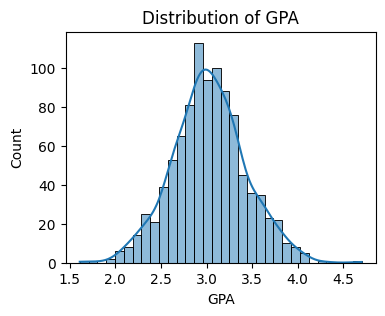

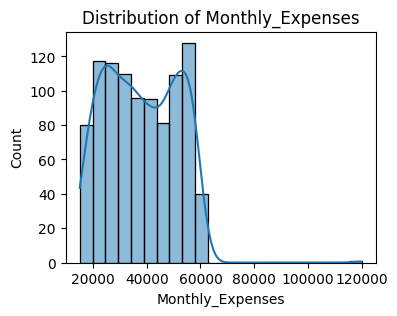

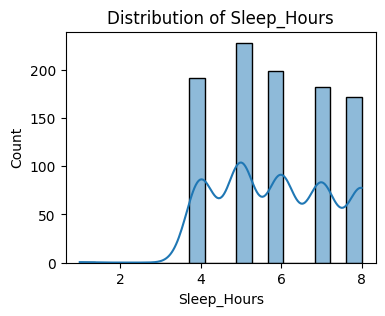

In [32]:
# Show data spread and shape for key numeric features using plot histogram
cols = ["GPA","Monthly_Expenses","Sleep_Hours"]
for i in cols:
    plt.figure(figsize = (4,3))
    sns.histplot(x = i, data=dataset, kde=True)
    plt.title(f"Distribution of {i}")
    plt.show()

In [33]:
dataset.shape

(973, 25)

In [34]:
from scipy import  stats

In [35]:
# Select columns to check for outliers
oulier_col = dataset[["GPA","Monthly_Expenses","Sleep_Hours"]]

In [36]:
# Filter out rows considered extreme outliers using Z_Score method
z_score = np.abs(stats.zscore(oulier_col))
dataset = dataset[(z_score < 3).all(axis=1)]

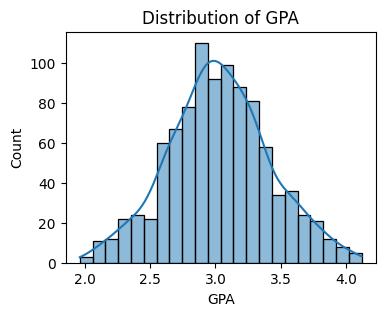

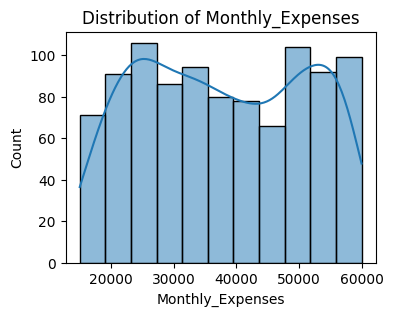

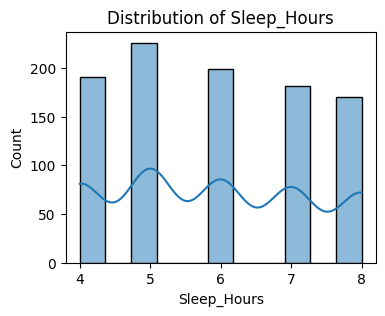

In [37]:
# Visualize cleaned data after removing outliers
check = ["GPA","Monthly_Expenses","Sleep_Hours"]
for i in check:
    plt.figure(figsize = (4,3))
    sns.histplot(x = i, data=dataset, kde=True)
    plt.title(f"Distribution of {i}")
    plt.show()

In [38]:
# Select columns for label encoding 
label_coder = dataset[['Lab_Equipment_Access','Transport_Mode','Department','Program_Level','Province','Nationality']]
get_dummies_code = ['Gender', 'Scholarship_Status', 'Part_Time_Job','Hostel_Resident', 'Internet_Access']

In [39]:
# Load LabelEncoder from scikit-learn 
from sklearn.preprocessing import LabelEncoder

In [40]:
# Apply LabelEncoder to selected categorical columns
le = LabelEncoder()
for i in label_coder:
    dataset.loc[:, i] = le.fit_transform(dataset[i])

In [41]:
# Apply one-hot encoding to selected columns 
dataset = pd.get_dummies(dataset, columns=get_dummies_code, drop_first=True)

In [42]:
# Select column for scaling
mon_exp = dataset[['Monthly_Expenses']]

In [43]:
# Load StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler

In [44]:
# Apply StandardScaler to selected column
ss = StandardScaler()
dataset['Monthly_Expenses'] = ss.fit_transform(mon_exp)

In [45]:
dataset.head()

,Student_ID,Age,Nationality,Province,Program_Level,Department,Year_of_Study,GPA,Attendance_Rate,Mental_Health_Score,...,Library_Usage,Canteen_Quality_Rating,Lab_Equipment_Access,Faculty_Satisfaction,Gender_Femle,Gender_Male,Scholarship_Status_Yes,Part_Time_Job_Yes,Hostel_Resident_Yes,Internet_Access_Yes
0,PSY0001,23,0,6,0,5,1,3.18,92.5,5,...,3,3,1,5.0,False,False,True,True,False,False
1,ELE0002,20,2,7,2,3,4,2.78,68.1,9,...,4,3,1,4.0,False,False,True,False,False,False
2,ELE0003,24,1,3,2,3,3,3.79,73.4,7,...,5,2,0,5.0,False,False,True,False,False,True
3,MAT0004,19,0,6,1,4,4,3.08,83.1,6,...,3,3,2,3.0,False,False,True,True,True,False
4,BIO0005,22,2,7,0,0,2,3.27,94.6,6,...,1,4,1,2.0,False,True,False,False,False,True


In [47]:
dataset['Monthly_Expenses']

0      0.743012
1      0.182572
2     -0.052448
3      1.215588
4      1.584478
         ...   
994   -0.965880
995   -0.512812
996   -0.963038
998   -0.435701
999   -0.527175
Name: Monthly_Expenses, Length: 967, dtype: float64

In [46]:
# Drop Student_ID because it's not useful for prediction 
dataset.drop(["Student_ID"], axis=1, inplace=True)

In [48]:
dataset.head()

,Age,Nationality,Province,Program_Level,Department,Year_of_Study,GPA,Attendance_Rate,Mental_Health_Score,Stress_Level,...,Library_Usage,Canteen_Quality_Rating,Lab_Equipment_Access,Faculty_Satisfaction,Gender_Femle,Gender_Male,Scholarship_Status_Yes,Part_Time_Job_Yes,Hostel_Resident_Yes,Internet_Access_Yes
0,23,0,6,0,5,1,3.18,92.5,5,6,...,3,3,1,5.0,False,False,True,True,False,False
1,20,2,7,2,3,4,2.78,68.1,9,5,...,4,3,1,4.0,False,False,True,False,False,False
2,24,1,3,2,3,3,3.79,73.4,7,4,...,5,2,0,5.0,False,False,True,False,False,True
3,19,0,6,1,4,4,3.08,83.1,6,10,...,3,3,2,3.0,False,False,True,True,True,False
4,22,2,7,0,0,2,3.27,94.6,6,10,...,1,4,1,2.0,False,True,False,False,False,True
